## Heating Cost of Windows

Jupyter notebook for:  

Heating Cost of Windows - SageMath for Undergraduates

https://sagemathnotes.miraheze.org/wiki/Heating_Cost_of_Windows#Prepare_to_Convert

Version:  2021 03 26 Draft  Kernel: SageMath 9.2  

## Prepare to Convert

In [69]:
# Conversion factors 

BTU_to_Joule     = 1055              # poked around on web to find this one 
cm_to_foot       = 1/( 2.54 * 12 ) 
day_to_hr        = 24.

# Enter the Window Data
I mesured the windows and entered the data

The calculation is straight forward.

Based on my readings I estimated the r value of my windows which are double glazed.

In [67]:
# from my hand notes 

# I lay this out to make as easy to read as reasonably possible
#    each line is for one window size 
window_measure_cm_sq  = ( 157 * 90 * 8 +    # length width * number of windows of each size 
                          157 * 60 * 8 +
                          200 * 86 * 4 +
                          160 * 60 * 2 )

print( f"window_measure_cm_sq {window_measure_cm_sq}")

window_measure_ft_sq   = window_measure_cm_sq * cm_to_foot * cm_to_foot  # because area are sq measures

print( f"window_measure_ft_sq {window_measure_ft_sq}")


r_value  = 2.  # probably about right for my windows
print( f"r_value estimate {r_value}")



window_measure_cm_sq 276400
window_measure_ft_sq 297.514483917857
r_value estimate 2.00000000000000


## Read the degree day file

I will use just the week index for the data and get 52 readings starting at the first date

### Copy the Code then Modify

from Data from CSV Files - Part 2


If you were doing this you could copy all the code over to a single cell, then edit it down and modify all the code in that cell as necessary, or
copy over selectively and modify.  That is a good approach.  But to show you I will:
* make a copy, 
* then a new copy of the copy and modify that
* then a copy of what I have so far, modify that...

That way you can see how I progress through the code.

Here is the copy no modifications:

In [57]:
import csv    # import module for csv tasks

file_name    = "periodic_table.csv"
with open( file_name, 'r') as a_file:
    csv_reader        = csv.reader( a_file )    # make a csv_reader which can read the file
    element_line_list = list( csv_reader )      # convert the csv version to a list


# element_list = []                                           # new empty list
# for i_line in  pop_lines_list:            # get index with line items
#     a_float       = float( i_line.rstrip() )
#     pop_list.append( a_float )                           # append builds on new list

# old print code heavily revised -- uses new list
for ix, i_element in enumerate( element_line_list ):            # get index with line items

    print( f"\n>>element_list  {ix}  {i_element} {type( i_element )}") # print the item we hope is a float

    if ix >= 5:   # limit the output
        break

ix_atomic_number      = 0  # integer
ix_element            = 1  # string
ix_symbol             = 2  # string
ix_atomic_mass        = 3  # float
ix_number_of_neutrons = 4  # integer
ix_number_of_protons  = 5  # int
ix_period             = 7  # int
ix_group              = 8  # int
ix_phase              = 9  # int
ix_radioactive        = 10 # boolean   in file; yes or blank
ix_natural            = 11 # boolean   in file; yes or blank
ix_metal              = 12 # boolean   in file yes or blank        
        
    
print( "checking values for Carbon the 6 the element in the list" )
ix_carbon = 6
data_for_carbon   = element_line_list[ix_carbon]
print( f"data_for_carbon{data_for_carbon}")

# now print out individual carbon data items -- ocd line up of columns
print() # blank line
print( f"data_for_carbon ix_atomic_number       {data_for_carbon[ix_atomic_number]} - {type(data_for_carbon[ix_atomic_number])}")
print( f"data_for_carbon ix_element             {data_for_carbon[ix_element]} - {type(data_for_carbon[ix_element])}")
print( f"data_for_carbon ix_symbol              {data_for_carbon[ix_symbol]} - {type(data_for_carbon[ix_symbol])}")
print( f"data_for_carbon ix_atomic_mass         {data_for_carbon[ix_atomic_mass]} - {type(data_for_carbon[ix_atomic_mass])}")
print( f"data_for_carbon ix_number_of_neutrons  {data_for_carbon[ix_number_of_neutrons]} - {type(data_for_carbon[ix_number_of_neutrons])}")
print( f"data_for_carbon ix_number_of_protons   {data_for_carbon[ix_number_of_protons]} - {type(data_for_carbon[ix_number_of_protons])}")
print( f"data_for_carbon ix_period              {data_for_carbon[ix_period]} - {type(data_for_carbon[ix_period])}")
print( f"data_for_carbon ix_group               {data_for_carbon[ix_group]} - {type(data_for_carbon[ix_group])}")
print( f"data_for_carbon ix_phase               {data_for_carbon[ix_phase]} - {type(data_for_carbon[ix_phase])}")
print( f"data_for_carbon ix_radioactive         {data_for_carbon[ix_radioactive]} - {type(data_for_carbon[ix_radioactive])}")
print( f"data_for_carbon ix_natural             {data_for_carbon[ix_natural]} - {type(data_for_carbon[ix_natural])}")
print( f"data_for_carbon ix_metal               {data_for_carbon[ix_metal]} - {type(data_for_carbon[ix_metal])}")  
    
for ix, i_line_data in enumerate( element_line_list ):
    if ix == 0:
        continue                   # this is the header line no data

    i_line_data[ix_atomic_number]        = int(   i_line_data[ix_atomic_number] )
    i_line_data[ix_atomic_mass]          = float( i_line_data[ix_atomic_mass] )
    i_line_data[ix_number_of_neutrons]   = int(   i_line_data[ix_number_of_neutrons] )
    i_line_data[ix_number_of_protons]    = int(   i_line_data[ix_number_of_protons] )

    i_line_data[ix_period]               = int(   i_line_data[ix_period] )
    # i_line_data[ix_group]                = to_group( i_line_data[ix_group] )      # some listed as blank, use my own convert

    i_line_data[ix_radioactive]          = bool(  i_line_data[ix_radioactive] )
    i_line_data[ix_natural]              = bool(  i_line_data[ix_natural] )
    i_line_data[ix_metal]                = bool(  i_line_data[ix_metal] )   

def to_group( a_value ):
    """
    Given a_value that is a string representing a group ( periodic table )
    return the corresponding number an int. 
    If a_value is blank, an empty string "" then
    return 0

    Other cases for a_value will cause the function to throw an error.
 
    """
    if a_value == "":
        return 0
    else:
        return int( a_value )    
    
for ix, i_line_data in enumerate( element_line_list ):
    if ix == 0:
        continue                   # this is the header line no data

    i_line_data[ix_atomic_number]        = int(   i_line_data[ix_atomic_number] )
    i_line_data[ix_atomic_mass]          = float( i_line_data[ix_atomic_mass] )
    i_line_data[ix_number_of_neutrons]   = int(   i_line_data[ix_number_of_neutrons] )
    i_line_data[ix_number_of_protons]    = int(   i_line_data[ix_number_of_protons] )

    i_line_data[ix_period]               = int(   i_line_data[ix_period] )
    i_line_data[ix_group]                = to_group( i_line_data[ix_group] )      # some listed as blank, use my own convert

    i_line_data[ix_radioactive]          = bool(  i_line_data[ix_radioactive] )
    i_line_data[ix_natural]              = bool(  i_line_data[ix_natural] )
    i_line_data[ix_metal]                = bool(  i_line_data[ix_metal] )   
    
    
    
# now print out individual carbon data items -- ocd line up of columns
print() # blank line
print( f"data_for_carbon ix_atomic_number       {data_for_carbon[ix_atomic_number]} - {type(data_for_carbon[ix_atomic_number])}")
print( f"data_for_carbon ix_element             {data_for_carbon[ix_element]} - {type(data_for_carbon[ix_element])}")
print( f"data_for_carbon ix_symbol              {data_for_carbon[ix_symbol]} - {type(data_for_carbon[ix_symbol])}")
print( f"data_for_carbon ix_atomic_mass         {data_for_carbon[ix_atomic_mass]} - {type(data_for_carbon[ix_atomic_mass])}")
print( f"data_for_carbon ix_number_of_neutrons  {data_for_carbon[ix_number_of_neutrons]} - {type(data_for_carbon[ix_number_of_neutrons])}")
print( f"data_for_carbon ix_number_of_protons   {data_for_carbon[ix_number_of_protons]} - {type(data_for_carbon[ix_number_of_protons])}")
print( f"data_for_carbon ix_period              {data_for_carbon[ix_period]} - {type(data_for_carbon[ix_period])}")
print( f"data_for_carbon ix_group               {data_for_carbon[ix_group]} - {type(data_for_carbon[ix_group])}")
print( f"data_for_carbon ix_phase               {data_for_carbon[ix_phase]} - {type(data_for_carbon[ix_phase])}")
print( f"data_for_carbon ix_radioactive         {data_for_carbon[ix_radioactive]} - {type(data_for_carbon[ix_radioactive])}")
print( f"data_for_carbon ix_natural             {data_for_carbon[ix_natural]} - {type(data_for_carbon[ix_natural])}")
print( f"data_for_carbon ix_metal               {data_for_carbon[ix_metal]} - {type(data_for_carbon[ix_metal])}")  
    
print() # blank line
print() # blank line
    
for ix, i_element in enumerate( element_line_list ):            # get index with line items

    print( f">>element_list what do we have?  {i_element} {type( i_element )}")

    if ix >= 10:   # limit the output
        break

   


>>element_list  0  ['AtomicNumber', 'Element', 'Symbol', 'AtomicMass', 'NumberofNeutrons', 'NumberofProtons', 'NumberofElectrons', 'Period', 'Group', 'Phase', 'Radioactive', 'Natural', 'Metal', 'Nonmetal', 'Metalloid', 'Type', 'AtomicRadius', 'Electronegativity', 'FirstIonization', 'Density', 'MeltingPoint', 'BoilingPoint', 'NumberOfIsotopes', 'Discoverer', 'Year', 'SpecificHeat', 'NumberofShells', 'NumberofValence'] <class 'list'>

>>element_list  1  ['1', 'Hydrogen', 'H', '1.007', '0', '1', '1', '1', '1', 'gas', '', 'yes', '', 'yes', '', 'Nonmetal', '0.79', '2.2', '13.5984', '8.99E-05', '14.175', '20.28', '3', 'Cavendish', '1766', '14.304', '1', '1'] <class 'list'>

>>element_list  2  ['2', 'Helium', 'He', '4.002', '2', '2', '2', '1', '18', 'gas', '', 'yes', '', 'yes', '', 'Noble Gas', '0.49', '', '24.5874', '1.79E-04', '', '4.22', '5', 'Janssen', '1868', '5.193', '1', ''] <class 'list'>

>>element_list  3  ['3', 'Lithium', 'Li', '6.941', '4', '3', '3', '2', '1', 'solid', '', 'yes',

### Result:
Reads the file, but not the file I want.
Also too much output, none of which I want.

### Next:

Pare down code leaving first 2 columns only 
 

In [58]:
import csv    # import module for csv tasks

file_name    = "periodic_table.csv"
with open( file_name, 'r') as a_file:
    csv_reader        = csv.reader( a_file )    # make a csv_reader which can read the file
    element_line_list = list( csv_reader )      # convert the csv version to a list

# element_list = []                                           # new empty list
# for i_line in  pop_lines_list:            # get index with line items
#     a_float       = float( i_line.rstrip() )
#     pop_list.append( a_float )                           # append builds on new list

# old print code heavily revised -- uses new list
for ix, i_element in enumerate( element_line_list ):            # get index with line items

    print( f"\n>>element_list  {ix}  {i_element} {type( i_element )}") # print the item we hope is a float

    if ix >= 5:   # limit the output
        break

ix_atomic_number      = 0  # integer
ix_element            = 1  # string
 
print( "checking values for Carbon the 6 the element in the list" )
ix_carbon = 6
data_for_carbon   = element_line_list[ix_carbon]
print( f"data_for_carbon{data_for_carbon}")

# now print out individual carbon data items -- ocd line up of columns
print() # blank line
print( f"data_for_carbon ix_atomic_number       {data_for_carbon[ix_atomic_number]} - {type(data_for_carbon[ix_atomic_number])}")
print( f"data_for_carbon ix_element             {data_for_carbon[ix_element]} - {type(data_for_carbon[ix_element])}")
  
    
for ix, i_line_data in enumerate( element_line_list ):
    if ix == 0:
        continue                   # this is the header line no data

    i_line_data[ix_atomic_number]        = int(   i_line_data[ix_atomic_number] )
    i_line_data[ix_atomic_mass]          = float( i_line_data[ix_atomic_mass] )
     
   
# now print out individual carbon data items -- ocd line up of columns
print() # blank line
print( f"data_for_carbon ix_atomic_number       {data_for_carbon[ix_atomic_number]} - {type(data_for_carbon[ix_atomic_number])}")
print( f"data_for_carbon ix_element             {data_for_carbon[ix_element]} - {type(data_for_carbon[ix_element])}")
 
print() # blank line
print() # blank line
    
for ix, i_element in enumerate( element_line_list ):            # get index with line items

    print( f">>element_list what do we have?  {i_element} {type( i_element )}")

    if ix >= 10:   # limit the output
        break

   


>>element_list  0  ['AtomicNumber', 'Element', 'Symbol', 'AtomicMass', 'NumberofNeutrons', 'NumberofProtons', 'NumberofElectrons', 'Period', 'Group', 'Phase', 'Radioactive', 'Natural', 'Metal', 'Nonmetal', 'Metalloid', 'Type', 'AtomicRadius', 'Electronegativity', 'FirstIonization', 'Density', 'MeltingPoint', 'BoilingPoint', 'NumberOfIsotopes', 'Discoverer', 'Year', 'SpecificHeat', 'NumberofShells', 'NumberofValence'] <class 'list'>

>>element_list  1  ['1', 'Hydrogen', 'H', '1.007', '0', '1', '1', '1', '1', 'gas', '', 'yes', '', 'yes', '', 'Nonmetal', '0.79', '2.2', '13.5984', '8.99E-05', '14.175', '20.28', '3', 'Cavendish', '1766', '14.304', '1', '1'] <class 'list'>

>>element_list  2  ['2', 'Helium', 'He', '4.002', '2', '2', '2', '1', '18', 'gas', '', 'yes', '', 'yes', '', 'Noble Gas', '0.49', '', '24.5874', '1.79E-04', '', '4.22', '5', 'Janssen', '1868', '5.193', '1', ''] <class 'list'>

>>element_list  3  ['3', 'Lithium', 'Li', '6.941', '4', '3', '3', '2', '1', 'solid', '', 'yes',

### Result:
Reads the file, but not the file I want.
Do have less code, and just a couple of columns converted. 
Also too much output, none of which I want.

### Next:
Copy again and start changing names for the degree days data, file name, variable name.....

file I downloaded is KBOS_HDD_65F.csv

In [59]:
import csv    # import module for csv tasks

file_name    = "KBOS_HDD_65F.csv"
with open( file_name, 'r') as a_file:
    csv_reader           = csv.reader( a_file )    # make a csv_reader which can read the file
    degree_day_line_list = list( csv_reader )      # convert the csv version to a list

# element_list = []                                           # new empty list
# for i_line in  pop_lines_list:            # get index with line items
#     a_float       = float( i_line.rstrip() )
#     pop_list.append( a_float )                           # append builds on new list

# old print code heavily revised -- uses new list
for ix, i_degree_day  in enumerate( degree_day_line_list ):            # get index with line items

    print( f"\n>>i_degree_day  {ix}  {i_degree_day} {type( i_degree_day )}") # print the item we hope is a float

    if ix >= 5:   # limit the output
        break

ix_date                  = 0  # integer
ix_degree_day            = 1  # float
 
 
for ix, i_degree_day in enumerate( degree_day_line_list ):
    if ix < 7 :
        continue                   # this is the header line no data

    #i_degree_day[ix_date]                 = int(   i_degree_day[ix_date] )
    i_degree_day[ix_degree_day]           = float( i_degree_day[ix_degree_day] )
     
   
# now print out individual carbon data items -- ocd line up of columns
#print() # blank line
#print( f"data_for_carbon ix_atomic_number       {data_for_carbon[ix_atomic_number]} - {type(data_for_carbon[ix_atomic_number])}")
#print( f"data_for_carbon ix_element             {data_for_carbon[ix_element]} - {type(data_for_carbon[ix_element])}")
 
print() # blank line
print() # blank line
    
for ix, i_degree_day in enumerate( degree_day_line_list ):            # get index with line items

    print( f">>degree_day_line_list what do we have?  {i_degree_day} {type( i_degree_day )}")

    if ix >= 52 + 7:   # limit the output
        break

   


>>i_degree_day  0  ['Description:', 'Fahrenheit-based heating degree days with a base temperature of 65 F'] <class 'list'>

>>i_degree_day  1  ['Source:', 'www.degreedays.net'] <class 'list'>

>>i_degree_day  2  ['Accuracy:', 'Estimates were made to account for missing data: the "% Estimated" column shows how much each figure was affected (0% is best, 100% is worst)'] <class 'list'>

>>i_degree_day  3  ['Station:', 'Boston, MA, US (71.00W,42.36N)'] <class 'list'>

>>i_degree_day  4  ['Station ID:', 'KBOS'] <class 'list'>

>>i_degree_day  5  ['', ''] <class 'list'>


>>degree_day_line_list what do we have?  ['Description:', 'Fahrenheit-based heating degree days with a base temperature of 65 F'] <class 'list'>
>>degree_day_line_list what do we have?  ['Source:', 'www.degreedays.net'] <class 'list'>
>>degree_day_line_list what do we have?  ['Accuracy:', 'Estimates were made to account for missing data: the "% Estimated" column shows how much each figure was affected (0% is best, 100% is 

### Result: 

Looks good, but we have header lines we do not want and ones at the end we do not want.
    

    

### Next: 
* Lets build a new list with just the degree day data (column 1 ) and just the lines 7 through 7 + 52 = one years of data 
    
* Lets also reduce the amount of output
    
* Finally make it a function 

* The index into the list will serve as the date, a week index starting from 2019-06-29


In [60]:
import csv    # import module for csv tasks

def read_degree_days():
    file_name    = "KBOS_HDD_65F.csv"
    with open( file_name, 'r') as a_file:
        csv_reader           = csv.reader( a_file )    # make a csv_reader which can read the file
        degree_day_line_list = list( csv_reader )      # convert the csv version to a list

    ix_date                  = 0  # integer
    ix_degree_day            = 1  # float

    for ix, i_degree_day in enumerate( degree_day_line_list ):
        if ix < 7 :
            continue                   # this is the header line no data

        #i_degree_day[ix_date]                 = int(   i_degree_day[ix_date] )
        i_degree_day[ix_degree_day]           = float( i_degree_day[ix_degree_day] )

    degree_days   = [] 
    for ix, i_degree_day in enumerate( degree_day_line_list ):            # get index with line items

        if ix < 7 :
            continue   
        if ix >= 52 + 7:   # limit the output
            break

        degree_days.append( i_degree_day[1])  
        
    return degree_days
        
degree_days   = read_degree_days()        
print( f"degree_days  {degree_days}" )
   

degree_days  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 5.0, 3.0, 11.0, 22.0, 6.0, 35.0, 52.0, 60.0, 60.0, 61.0, 124.0, 187.0, 174.0, 145.0, 215.0, 183.0, 214.0, 183.0, 163.0, 193.0, 151.0, 244.0, 181.0, 177.0, 203.0, 218.0, 154.0, 183.0, 134.0, 167.0, 175.0, 172.0, 135.0, 126.0, 155.0, 139.0, 77.0, 101.0, 65.0, 46.0, 24.0, 12.0, 20.0, 1.0]


### Result:
We are done getting the degree_day data. We now have a function to use any time we want.  What was about 130 lines of code ended up being about 30.

Done reading the data file, you probably should have done this in one cell with successive cycles of run, modify, run, ... done

## Calculate Energy Loss
Convert the degree days into energy and power

In [70]:

energy_week_list     = []         #
power_for_week_list  = []         # watts = energy/delta_t_in_seconds
for i_degree_days in degree_days:
    degree_days_in_hr            = i_degree_days * day_to_hr

    energy_loss_for_week_btu     = degree_days_in_hr * window_measure_ft_sq  / r_value 
    energy_loss_for_week_joules  = energy_loss_for_week_btu * BTU_to_Joule

    sec_in_week   = 7 * 24 * 60 * 60

    power   = energy_loss_for_week_joules/( sec_in_week )
    
    energy_week_list.append( energy_loss_for_week_joules )
    power_for_week_list.append( power )
    
print( power_for_week_list )


[0.000000000000000, 0.000000000000000, 0.000000000000000, 0.000000000000000, 0.000000000000000, 0.000000000000000, 6.22773374074085, 0.000000000000000, 31.1386687037042, 18.6832012222225, 68.5050711481493, 137.010142296299, 37.3664024444451, 217.970680925930, 323.842154518524, 373.664024444451, 373.664024444451, 379.891758185192, 772.238983851865, 1164.58620951854, 1083.62567088891, 903.021392407423, 1338.96275425928, 1139.67527455558, 1332.73502051854, 1139.67527455558, 1015.12059974076, 1201.95261196298, 940.387794851868, 1519.56703274077, 1127.21980707409, 1102.30887211113, 1264.22994937039, 1357.64595548151, 959.070996074091, 1139.67527455558, 834.516321259274, 1040.03153470372, 1089.85340462965, 1071.17020340743, 840.744055000015, 784.694451333347, 965.298729814832, 865.654989962978, 479.535498037045, 629.001107814826, 404.802693148155, 286.475752074079, 149.465609777780, 74.7328048888902, 124.554674814817, 6.22773374074085]


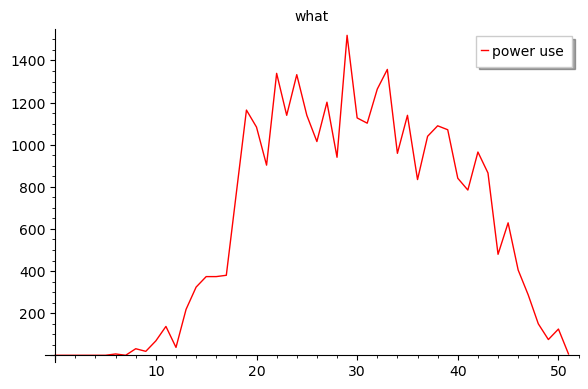

In [62]:


zip_with_index = False


if  zip_with_index:

    week_index   = list( range( len(power_for_week_list )))

    plot_data    = list( zip( week_index, power_for_week_list ) )
else:
    plot_data    = power_for_week_list


a_plot     = sage.plot.plot.list_plot( plot_data,
                                       plotjoined   = True,
                                     
                                       color         = "red",   
                                       linestyle     = "-",   
                                       #fill=False,     ilegal 
                                       thickness     = 1, 
                                       legend_label  = "power use",  )                                    
                                     
                                     
                                     
                                     
                    
show( a_plot, title = "what" )





In [1]:
import datetime
print( f"Ran last cell in Notebook => {datetime.datetime.now()}")

Ran last cell in Notebook => 2021-04-24 09:36:43.781992
